In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Mall_Customers.csv')
mainpath = 'C:/Users/malco/aaPythonPersonalNotebook/DBS Data Scientist Treasury and Market Operations/dataset/'

#adult_data_RenameCol_MinMax_LE_5050
df_orig = pd.read_csv(mainpath + 'adult_data.csv',index_col = 0) #orig
# df = pd.read_csv(mainpath + 'adult_data_Binary5050.csv',index_col = 0) 
# df_orig.head(2)

In [3]:
# genders = df.Gender.value_counts()
# df.drop(["CustomerID"], axis = 1, inplace=True)
dfy_explanation = pd.read_csv(mainpath + 'adult_data_Binary5050.csv',index_col = 0)

dfy = pd.read_csv(mainpath + 'adult_data_Binary5050_LE.csv',index_col = 0)
dfy.reset_index(drop = True, inplace= True)
dfy.head(2)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,44,116358,13,0,0,40,1,3,9,2,12,0,1,1,38
1,43,289669,14,0,2547,40,1,3,12,0,10,4,4,0,38


In [212]:

dfy_class = dfy['class']

desired_col1 = 'age' #int
desired_col2 = 'education' #continuous

dfx = dfy[[desired_col1, desired_col2]] 
dfx

,age,workclass
28244,44,3
27244,43,3
2294,21,3
24812,73,0
950,43,3
...,...,...
4534,48,3
21194,55,3
12944,67,5
28376,23,2


In [213]:
dfx.reset_index(drop = True,inplace= True)
dfy_class.reset_index(drop = True,inplace= True)

df = pd.concat([dfx,dfy_class],axis=1)

df.columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df.dropna(inplace=  True, axis=0)
df
df = df[:300]
df
# df_cols = df.columns.to_list()
# print("df_cols:",df_cols[0])

,Age,Annual Income (k$),Spending Score (1-100)
0,44,3,1
1,43,3,1
2,21,3,0
3,73,0,0
4,43,3,1
...,...,...,...
295,39,6,0
296,39,5,1
297,36,5,1
298,23,3,0


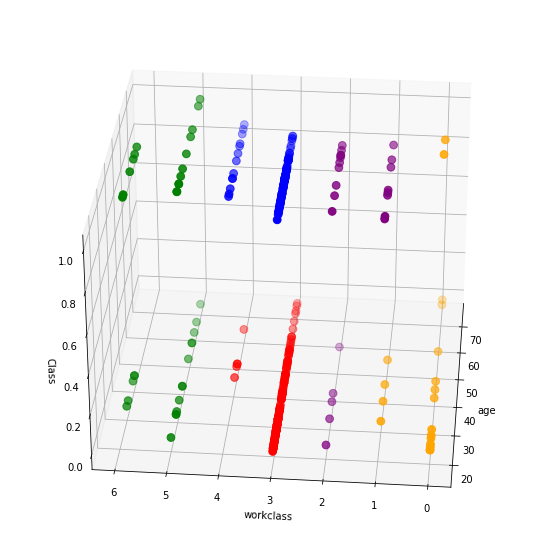

,age,workclass,class,label,age,workclass,color
0,44,3,1,0,44,Private,Blue
1,43,3,1,0,43,Private,Blue
2,21,3,0,1,21,Private,Red
3,73,0,0,3,73,?,Orange
4,43,3,1,0,43,Private,Blue
5,46,3,1,0,46,Private,Blue
6,59,3,1,0,59,Private,Blue
7,75,0,0,3,75,?,Orange
8,26,3,0,1,26,Private,Red
9,27,3,1,0,27,Private,Blue


In [230]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)

plt.xlabel(desired_col1)
plt.ylabel(desired_col2)
ax.set_zlabel('Class')

# ax.view_init(30, 60)#30, 185
# plt.show()

ax.view_init(30, 185)#30, 185
plt.show()
from pandas import set_option
pd.set_option('max_rows',0)
df_temp = df.copy()
df_temp.columns = [desired_col1, desired_col2, 'class', 'label']
df_temp

dfy_explanation_temp = dfy_explanation[[desired_col1, desired_col2]][:300]
dfy_explanation_temp.reset_index(drop = True, inplace= True)
dfy_explanation_temp
df_presentation = pd.concat([df_temp, dfy_explanation_temp],axis=1)
df_presentation

df_presentation
def get_label_color(x):
    if x == 0:
        col = 'Blue'
    if x == 1:
        col = 'Red'
    if x == 2:
        col = 'Green'
    if x == 3:
        col = 'Orange'
    if x == 4:
        col = 'Purple'
    return col

df_presentation['color'] = df_presentation['label']
df_presentation
df_presentation['color'] = df_presentation['color'] .apply(lambda x: get_label_color(x))
df_presentation
    

In [231]:
# dfy_explanation_temp = dfy_explanation[[desired_col1, desired_col2]][:300]
# dfy_explanation_temp.reset_index(drop = True, inplace= True)
# dfy_explanation_temp
# # dfy_explanation
# df_presentation
# # df.columns = [desired_col1, desired_col2, 'class', 'label']
# # df
 

In [232]:
# df_presentation
# def get_label_color(x):
#     if x == 0:
#         col = 'Blue'
#     if x == 1:
#         col = 'Red'
#     if x == 2:
#         col = 'Green'
#     if x == 3:
#         col = 'Orange'
#     if x == 4:
#         col = 'Purple'
#     return col

# df_presentation['color'] = df_presentation['label']
# df_presentation
# df_presentation['color'] = df_presentation['color'] .apply(lambda x: get_label_color(x))
# df_presentation
    

# Putting it all together

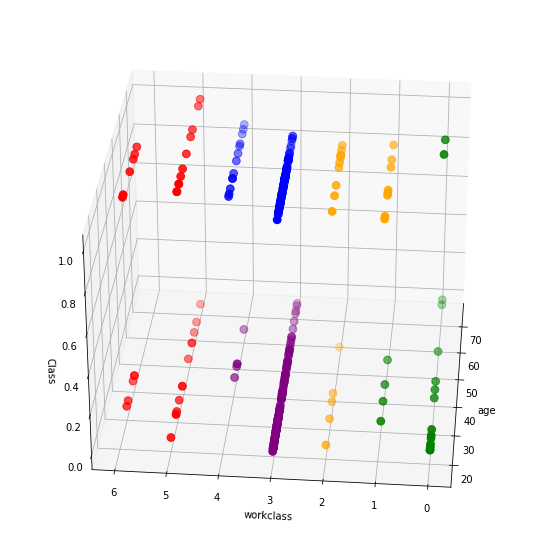

df_presentation:
     age workclass  class  label  age          workclass   color
0    44         3      1      0   44            Private    Blue
1    43         3      1      0   43            Private    Blue
2    21         3      0      4   21            Private  Purple
3    73         0      0      2   73                  ?   Green
4    43         3      1      0   43            Private    Blue
5    46         3      1      0   46            Private    Blue
6    59         3      1      0   59            Private    Blue
7    75         0      0      2   75                  ?   Green
8    26         3      0      4   26            Private  Purple
9    27         3      1      0   27            Private    Blue
10   36         3      1      0   36            Private    Blue
11   40         3      1      0   40            Private    Blue
12   53         3      0      4   53            Private  Purple
13   38         3      0      4   38            Private  Purple
14   44         3     

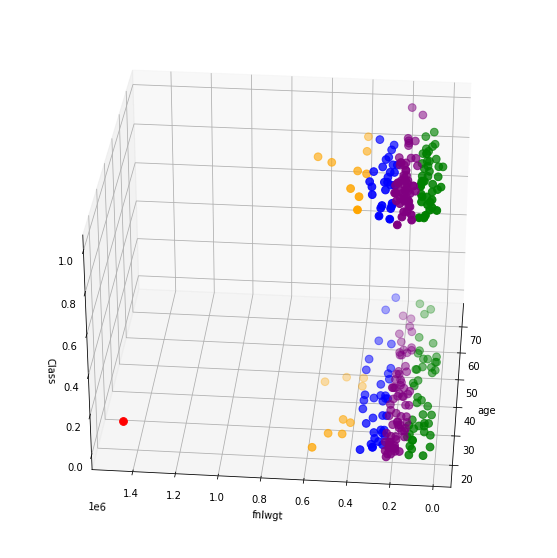

df_presentation:
     age  fnlwgt  class  label  age  fnlwgt   color
0    44  116358      1      2   44  116358   Green
1    43  289669      1      0   43  289669    Blue
2    21  212619      0      4   21  212619  Purple
3    73  135601      0      2   73  135601   Green
4    43  227065      1      4   43  227065  Purple
5    46   90042      1      2   46   90042   Green
6    59  195820      1      4   59  195820  Purple
7    75  260543      0      0   75  260543    Blue
8    26  262656      0      0   26  262656    Blue
9    27  207352      1      4   27  207352  Purple
10   36  172104      1      4   36  172104  Purple
11   40  187802      1      4   40  187802  Purple
12   53   29557      0      2   53   29557   Green
13   38  104089      0      2   38  104089   Green
14   44  219441      0      4   44  219441  Purple
15   20  109813      0      2   20  109813   Green
16   20  293297      0      0   20  293297    Blue
17   42  191765      0      4   42  191765  Purple
18   38  1766

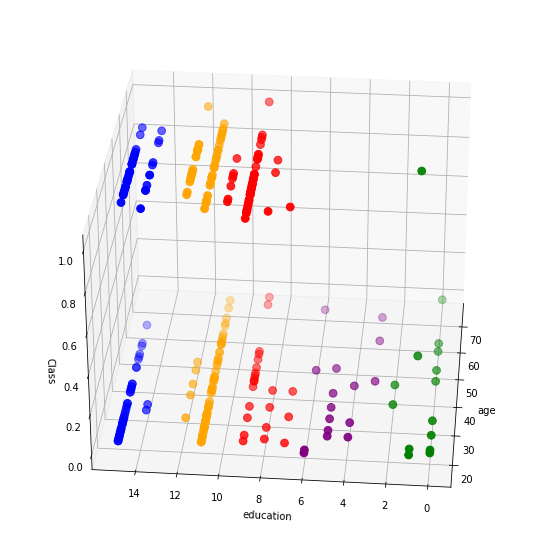

df_presentation:
     age education  class  label  age      education   color
0    44         9      1      1   44      Bachelors     Red
1    43        12      1      3   43        Masters  Orange
2    21         8      0      1   21      Assoc-voc     Red
3    73         9      0      1   73      Bachelors     Red
4    43        12      1      3   43        Masters  Orange
5    46        15      1      0   46   Some-college    Blue
6    59        11      1      3   59        HS-grad  Orange
7    75         0      0      2   75           10th   Green
8    26        11      0      3   26        HS-grad  Orange
9    27         9      1      1   27      Bachelors     Red
10   36        14      1      0   36    Prof-school    Blue
11   40        15      1      0   40   Some-college    Blue
12   53        15      0      0   53   Some-college    Blue
13   38         8      0      1   38      Assoc-voc     Red
14   44         0      0      2   44           10th   Green
15   20         1     

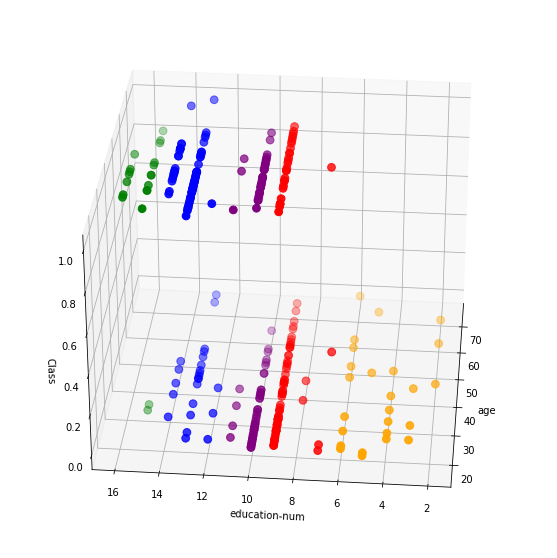

df_presentation:
     age  education-num  class  label  age  education-num   color
0    44             13      1      0   44             13    Blue
1    43             14      1      0   43             14    Blue
2    21             11      0      4   21             11  Purple
3    73             13      0      0   73             13    Blue
4    43             14      1      0   43             14    Blue
5    46             10      1      4   46             10  Purple
6    59              9      1      1   59              9     Red
7    75              6      0      3   75              6  Orange
8    26              9      0      1   26              9     Red
9    27             13      1      0   27             13    Blue
10   36             15      1      2   36             15   Green
11   40             10      1      4   40             10  Purple
12   53             10      0      4   53             10  Purple
13   38             11      0      4   38             11  Purple
14   44

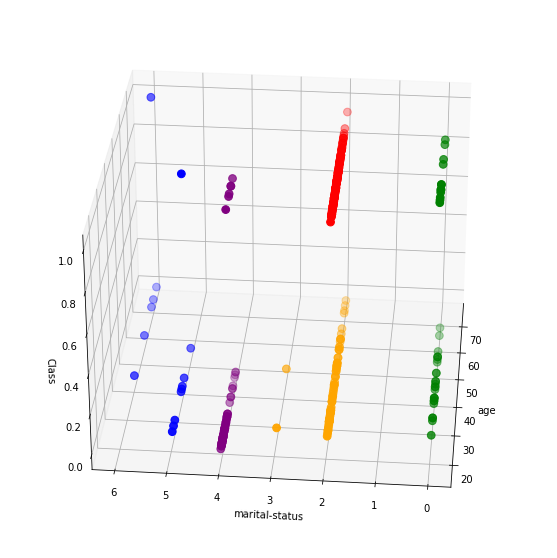

df_presentation:
     age marital-status  class  label  age       marital-status   color
0    44              2      1      1   44   Married-civ-spouse     Red
1    43              0      1      2   43             Divorced   Green
2    21              4      0      4   21        Never-married  Purple
3    73              2      0      3   73   Married-civ-spouse  Orange
4    43              2      1      1   43   Married-civ-spouse     Red
5    46              2      1      1   46   Married-civ-spouse     Red
6    59              2      1      1   59   Married-civ-spouse     Red
7    75              6      0      0   75              Widowed    Blue
8    26              4      0      4   26        Never-married  Purple
9    27              2      1      1   27   Married-civ-spouse     Red
10   36              4      1      4   36        Never-married  Purple
11   40              2      1      1   40   Married-civ-spouse     Red
12   53              0      0      2   53             Divor

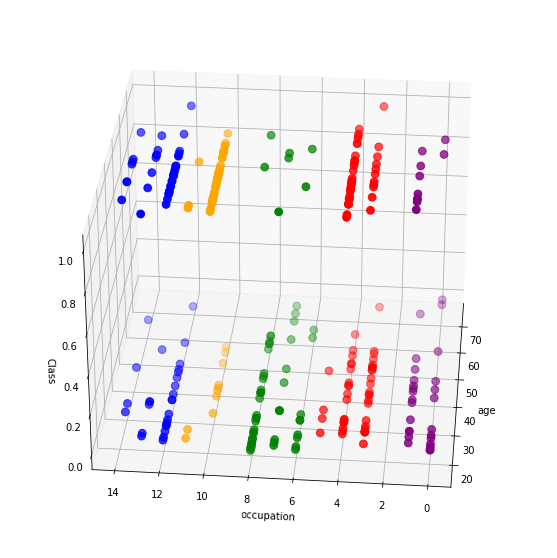

df_presentation:
     age occupation  class  label  age          occupation   color
0    44         12      1      0   44               Sales    Blue
1    43         10      1      3   43      Prof-specialty  Orange
2    21          7      0      2   21   Machine-op-inspct   Green
3    73          0      0      4   73                   ?  Purple
4    43          4      1      1   43     Exec-managerial     Red
5    46          3      1      1   46        Craft-repair     Red
6    59         14      1      0   59    Transport-moving    Blue
7    75          0      0      4   75                   ?  Purple
8    26          1      0      4   26        Adm-clerical  Purple
9    27         13      1      0   27        Tech-support    Blue
10   36         10      1      3   36      Prof-specialty  Orange
11   40          6      1      2   40   Handlers-cleaners   Green
12   53         10      0      3   53      Prof-specialty  Orange
13   38          3      0      1   38        Craft-repair 

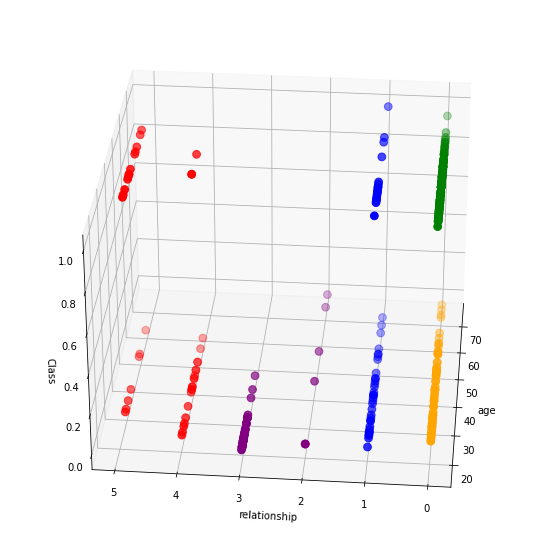

df_presentation:
     age relationship  class  label  age     relationship   color
0    44            0      1      2   44          Husband   Green
1    43            4      1      1   43        Unmarried     Red
2    21            3      0      4   21        Own-child  Purple
3    73            0      0      3   73          Husband  Orange
4    43            0      1      2   43          Husband   Green
5    46            0      1      2   46          Husband   Green
6    59            0      1      2   59          Husband   Green
7    75            2      0      4   75   Other-relative  Purple
8    26            3      0      4   26        Own-child  Purple
9    27            0      1      2   27          Husband   Green
10   36            1      1      0   36    Not-in-family    Blue
11   40            0      1      2   40          Husband   Green
12   53            1      0      0   53    Not-in-family    Blue
13   38            3      0      4   38        Own-child  Purple
14   44

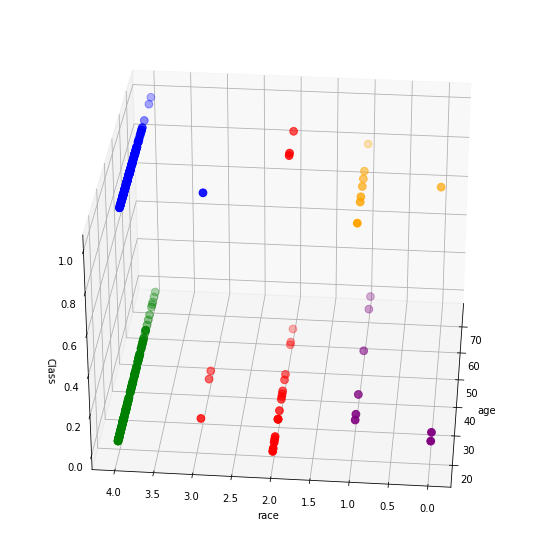

df_presentation:
     age race  class  label  age                 race   color
0    44    1      1      3   44   Asian-Pac-Islander  Orange
1    43    4      1      0   43                White    Blue
2    21    4      0      2   21                White   Green
3    73    4      0      2   73                White   Green
4    43    4      1      0   43                White    Blue
5    46    4      1      0   46                White    Blue
6    59    4      1      0   59                White    Blue
7    75    1      0      4   75   Asian-Pac-Islander  Purple
8    26    4      0      2   26                White   Green
9    27    1      1      3   27   Asian-Pac-Islander  Orange
10   36    3      1      0   36                Other    Blue
11   40    4      1      0   40                White    Blue
12   53    4      0      2   53                White   Green
13   38    4      0      2   38                White   Green
14   44    3      0      1   44                Other     Red
15   2

c:\users\malco\appdata\local\programs\python\python36\lib\site-packages\sklearn\cluster\_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


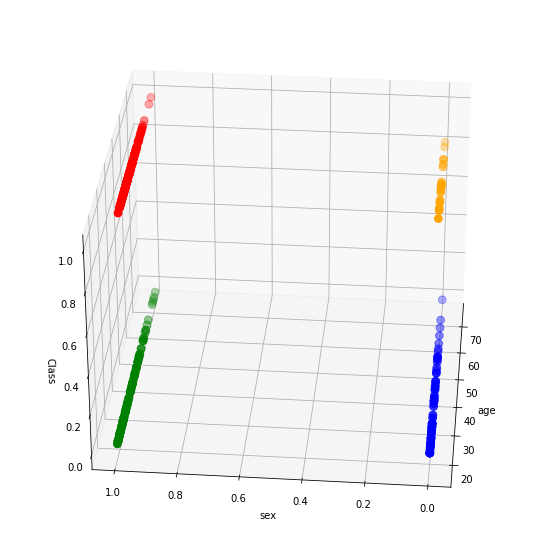

df_presentation:
     age sex  class  label  age      sex   color
0    44   1      1      1   44     Male     Red
1    43   0      1      3   43   Female  Orange
2    21   1      0      2   21     Male   Green
3    73   1      0      2   73     Male   Green
4    43   1      1      1   43     Male     Red
5    46   1      1      1   46     Male     Red
6    59   1      1      1   59     Male     Red
7    75   0      0      0   75   Female    Blue
8    26   0      0      0   26   Female    Blue
9    27   1      1      1   27     Male     Red
10   36   1      1      1   36     Male     Red
11   40   1      1      1   40     Male     Red
12   53   0      0      0   53   Female    Blue
13   38   1      0      2   38     Male   Green
14   44   0      0      0   44   Female    Blue
15   20   1      0      2   20     Male   Green
16   20   1      0      2   20     Male   Green
17   42   0      0      0   42   Female    Blue
18   38   1      0      2   38     Male   Green
19   36   1      1    

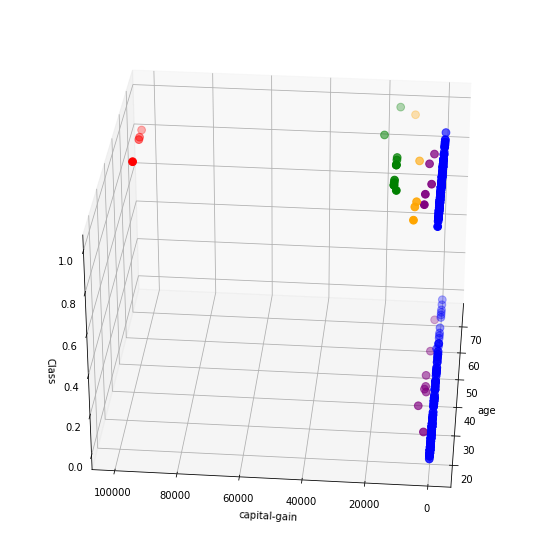

df_presentation:
     age  capital-gain  class  label  age  capital-gain   color
0    44             0      1      0   44             0    Blue
1    43             0      1      0   43             0    Blue
2    21             0      0      0   21             0    Blue
3    73             0      0      0   73             0    Blue
4    43             0      1      0   43             0    Blue
5    46             0      1      0   46             0    Blue
6    59             0      1      0   59             0    Blue
7    75             0      0      0   75             0    Blue
8    26             0      0      0   26             0    Blue
9    27             0      1      0   27             0    Blue
10   36             0      1      0   36             0    Blue
11   40             0      1      0   40             0    Blue
12   53             0      0      0   53             0    Blue
13   38             0      0      0   38             0    Blue
14   44             0      0      0  

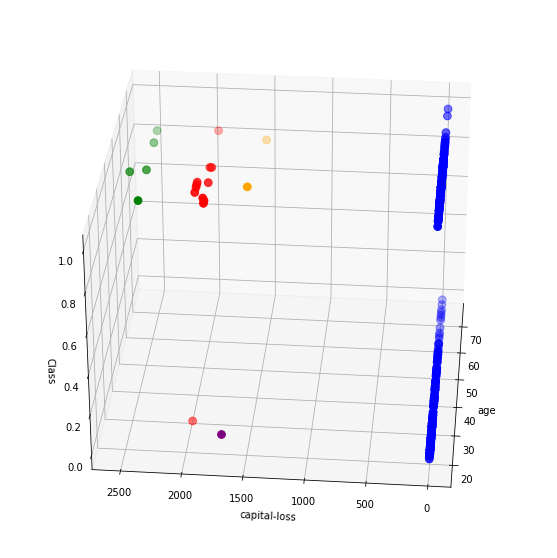

df_presentation:
     age  capital-loss  class  label  age  capital-loss  color
0    44             0      1      0   44             0   Blue
1    43          2547      1      2   43          2547  Green
2    21             0      0      0   21             0   Blue
3    73             0      0      0   73             0   Blue
4    43             0      1      0   43             0   Blue
5    46             0      1      0   46             0   Blue
6    59             0      1      0   59             0   Blue
7    75             0      0      0   75             0   Blue
8    26             0      0      0   26             0   Blue
9    27             0      1      0   27             0   Blue
10   36             0      1      0   36             0   Blue
11   40          1887      1      1   40          1887    Red
12   53             0      0      0   53             0   Blue
13   38             0      0      0   38             0   Blue
14   44             0      0      0   44            

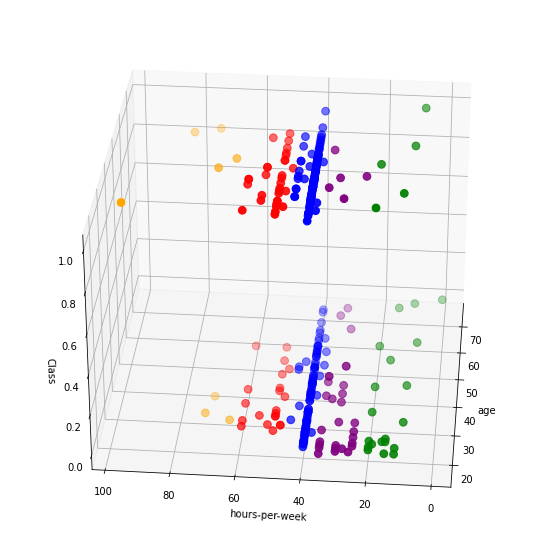

df_presentation:
     age  hours-per-week  class  label  age  hours-per-week   color
0    44              40      1      0   44              40    Blue
1    43              40      1      0   43              40    Blue
2    21              40      0      0   21              40    Blue
3    73              10      0      2   73              10   Green
4    43              43      1      0   43              43    Blue
5    46              40      1      0   46              40    Blue
6    59              40      1      0   59              40    Blue
7    75               1      0      2   75               1   Green
8    26              40      0      0   26              40    Blue
9    27              40      1      0   27              40    Blue
10   36              40      1      0   36              40    Blue
11   40              40      1      0   40              40    Blue
12   53              40      0      0   53              40    Blue
13   38              40      0      0   38  

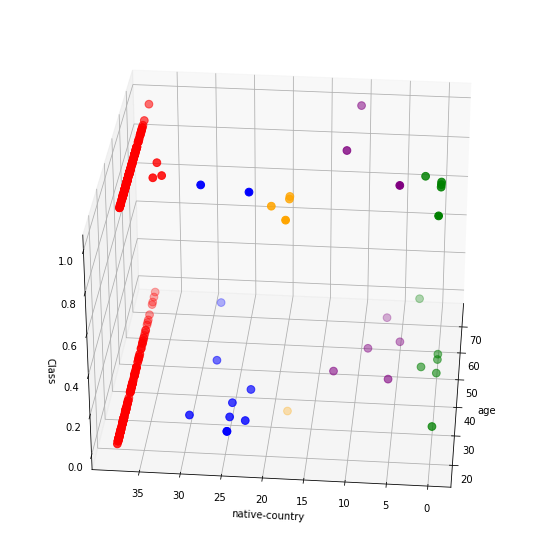

df_presentation:
     age native-country  class  label  age       native-country   color
0    44             38      1      1   44        United-States     Red
1    43             38      1      1   43        United-States     Red
2    21             38      0      1   21        United-States     Red
3    73             38      0      1   73        United-States     Red
4    43             38      1      1   43        United-States     Red
5    46             38      1      1   46        United-States     Red
6    59             38      1      1   59        United-States     Red
7    75              3      0      2   75                China   Green
8    26             38      0      1   26        United-States     Red
9    27             18      1      3   27                India  Orange
10   36             18      1      3   36                India  Orange
11   40             38      1      1   40        United-States     Red
12   53             38      0      1   53        United-Sta

c:\users\malco\appdata\local\programs\python\python36\lib\site-packages\sklearn\cluster\_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


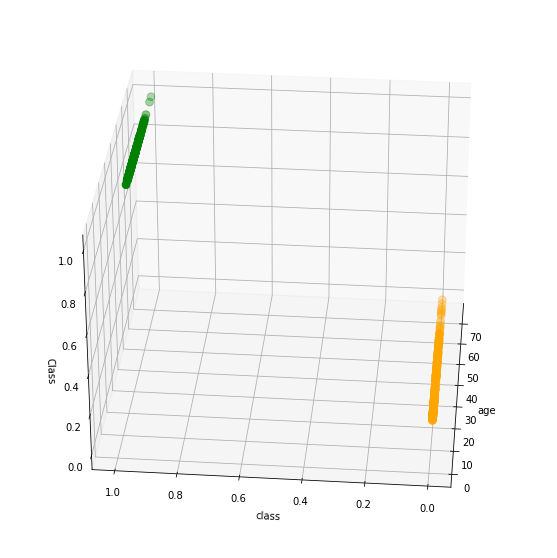

df_presentation:
     age  class  class  label  age  class   color
0    44      1      1      2   44      1   Green
1    43      1      1      2   43      1   Green
2    21      0      0      3   21      0  Orange
3    73      0      0      3   73      0  Orange
4    43      1      1      2   43      1   Green
5    46      1      1      2   46      1   Green
6    59      1      1      2   59      1   Green
7    75      0      0      3   75      0  Orange
8    26      0      0      3   26      0  Orange
9    27      1      1      2   27      1   Green
10   36      1      1      2   36      1   Green
11   40      1      1      2   40      1   Green
12   53      0      0      3   53      0  Orange
13   38      0      0      3   38      0  Orange
14   44      0      0      3   44      0  Orange
15   20      0      0      3   20      0  Orange
16   20      0      0      3   20      0  Orange
17   42      0      0      3   42      0  Orange
18   38      0      0      3   38      0  Orange
19

IndexError: list index out of range

In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Mall_Customers.csv')
mainpath = 'C:/Users/malco/aaPythonPersonalNotebook/DBS Data Scientist Treasury and Market Operations/dataset/'

#adult_data_RenameCol_MinMax_LE_5050
df_orig = pd.read_csv(mainpath + 'adult_data.csv',index_col = 0) #orig
# df = pd.read_csv(mainpath + 'adult_data_Binary5050.csv',index_col = 0) 
# df_orig.head(2)


# genders = df.Gender.value_counts()
# df.drop(["CustomerID"], axis = 1, inplace=True)
dfy_explanation = pd.read_csv(mainpath + 'adult_data_Binary5050.csv',index_col = 0)

dfy = pd.read_csv(mainpath + 'adult_data_Binary5050_LE.csv',index_col = 0)


dfy_class = dfy['class']

# desired_col1 = 'age' #int
# desired_col2 = 'education' #continuous

dfy_explanation
colname_final_all = dfy_explanation.columns.to_list()
colname_final_all
desired_col1 = colname_final_all[0] #age
for univ_count in range(1, len(dfy_explanation)):
    desired_col2 = colname_final_all[univ_count] #workclass.. fnlwgt.. native-country
    colname_2

    dfx = dfy[[desired_col1, desired_col2]] 
    dfx

    dfx.reset_index(drop = True,inplace= True)
    dfy_class.reset_index(drop = True,inplace= True)

    df = pd.concat([dfx,dfy_class],axis=1)

    df.columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
    df.dropna(inplace=  True, axis=0)
    df
    df = df[:300]
    df
    
    from sklearn.cluster import KMeans
    km = KMeans(n_clusters=5)
    clusters = km.fit_predict(df.iloc[:,1:])
    df["label"] = clusters

    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
    ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
    ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
    ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
    ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)

    plt.xlabel(desired_col1)
    plt.ylabel(desired_col2)
    ax.set_zlabel('Class')

    # ax.view_init(30, 60)#30, 185
    # plt.show()

    ax.view_init(30, 185)#30, 185
    plt.show()
    from pandas import set_option
    pd.set_option('max_rows',100)
    df_temp = df.copy()
    df_temp.columns = [desired_col1, desired_col2, 'class', 'label']
    df_temp

    dfy_explanation_temp = dfy_explanation[[desired_col1, desired_col2]][:300]
    dfy_explanation_temp.reset_index(drop = True, inplace= True)
    dfy_explanation_temp
    df_presentation = pd.concat([df_temp, dfy_explanation_temp],axis=1)
    df_presentation

    df_presentation
    def get_label_color(x):
        if x == 0:
            col = 'Blue'
        if x == 1:
            col = 'Red'
        if x == 2:
            col = 'Green'
        if x == 3:
            col = 'Orange'
        if x == 4:
            col = 'Purple'
        return col

    df_presentation['color'] = df_presentation['label']
    df_presentation
    df_presentation['color'] = df_presentation['color'] .apply(lambda x: get_label_color(x))
    print("df_presentation:\n",df_presentation.head(50))





,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
28244,44,Private,116358,Bachelors,13,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,1
27244,43,Private,289669,Masters,14,Divorced,Prof-specialty,Unmarried,White,Female,0,2547,40,United-States,1
2294,21,Private,212619,Assoc-voc,11,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,0
24812,73,?,135601,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,0
950,43,Private,227065,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,43,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4534,48,Private,377757,10th,6,Married-civ-spouse,Sales,Husband,White,Male,0,0,70,United-States,0
21194,55,Private,196126,Bachelors,13,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,?,0
12944,67,Self-emp-not-inc,106143,Doctorate,16,Married-civ-spouse,Sales,Husband,White,Male,20051,0,40,United-States,1
28376,23,Local-gov,442359,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,1092,40,United-States,0


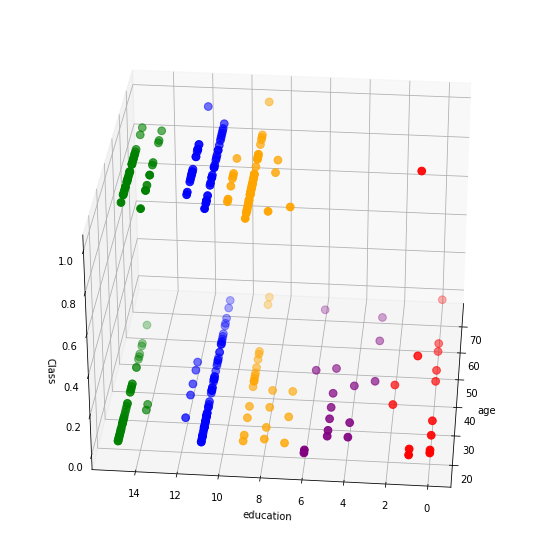

df_presentation:
      age education  class  label  age      education   color
0     44         9      1      3   44      Bachelors  Orange
1     43        12      1      0   43        Masters    Blue
2     21         8      0      3   21      Assoc-voc  Orange
3     73         9      0      3   73      Bachelors  Orange
4     43        12      1      0   43        Masters    Blue
..   ...       ...    ...    ...  ...            ...     ...
295   39         9      0      3   39      Bachelors  Orange
296   39        10      1      3   39      Doctorate  Orange
297   36        12      1      0   36        Masters    Blue
298   23         5      0      4   23        7th-8th  Purple
299   46        15      1      2   46   Some-college   Green

[300 rows x 7 columns]
